In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"/content/drive/MyDrive/swiggy delivery time prediction/swiggy_cleaned.csv")

Exploratory Data Analysis

In [3]:
df.head(5)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138


In [4]:
df.tail(3)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,16,CHEN,11,3,friday,0,15.0,23.0,night,4.657195
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393
45501,RANCHIRES09DEL02,23.0,4.9,23.351058,85.325731,23.431058,85.405731,2022-03-02,fog,medium,...,36,RANCHI,2,3,wednesday,0,5.0,17.0,evening,12.074396


In [5]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

In [6]:
df['age'] # to get single column in dataset

,age
0,37.0
1,34.0
2,23.0
3,38.0
4,32.0
...,...
45497,30.0
45498,21.0
45499,30.0
45500,20.0


In [7]:
df[['age','ratings']]  # to access multiple columns

,age,ratings
0,37.0,4.9
1,34.0,4.5
2,23.0,4.4
3,38.0,4.7
4,32.0,4.6
...,...,...
45497,30.0,4.8
45498,21.0,4.6
45499,30.0,4.9
45500,20.0,4.7


In [8]:
df.info()  #complete info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

In [9]:
#distributions
df.describe() #statistical summary

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,vehicle_condition,multiple_deliveries,time_taken,order_day,order_month,is_weekend,pickup_time_minutes,order_time_hour,distance
count,43648.000000,43594.000000,41872.000000,41872.000000,41872.000000,41872.000000,45502.000000,44509.000000,45502.000000,45502.000000,45502.000000,45502.000000,43862.000000,43862.000000,41872.000000
mean,29.555008,4.635287,18.913696,76.921664,18.977356,76.985325,1.019406,0.744928,26.297591,13.811657,2.980726,0.274867,9.989399,17.423966,9.719296
std,5.761482,0.313827,5.467265,3.503107,5.469056,3.503260,0.835229,0.572488,9.386419,8.709540,0.546031,0.446452,4.087516,4.817856,5.602890
min,20.000000,2.500000,9.957144,72.768726,9.967144,72.778726,0.000000,0.000000,10.000000,1.000000,2.000000,0.000000,5.000000,0.000000,1.465067
25%,25.000000,4.500000,12.986047,73.897902,13.065996,73.940327,0.000000,0.000000,19.000000,6.000000,3.000000,0.000000,5.000000,15.000000,4.657655
50%,30.000000,4.700000,19.065838,76.618203,19.124049,76.662620,1.000000,1.000000,26.000000,13.000000,3.000000,0.000000,10.000000,19.000000,9.193014
75%,35.000000,4.900000,22.751234,78.368855,22.820040,78.405467,2.000000,1.000000,32.000000,20.000000,3.000000,1.000000,15.000000,21.000000,13.680920
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000,31.000000,4.000000,1.000000,15.000000,23.000000,20.969489


<Axes: ylabel='Frequency'>

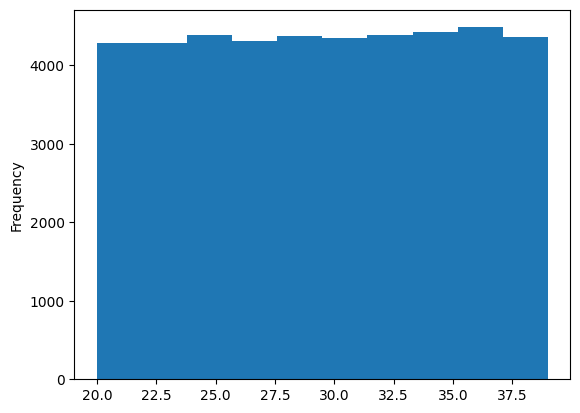

In [10]:
df['age'].plot(kind = 'hist')

<Axes: ylabel='Density'>

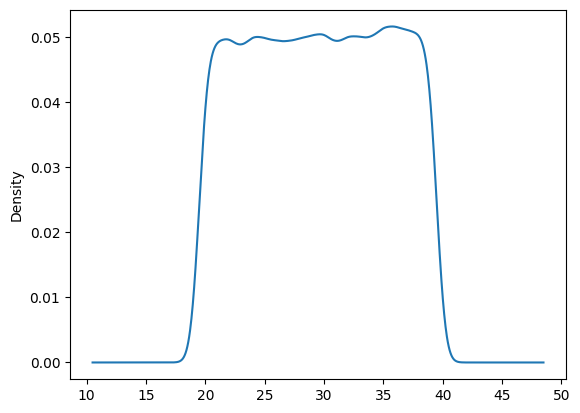

In [11]:
df['age'].plot(kind = 'kde')

<Axes: ylabel='Density'>

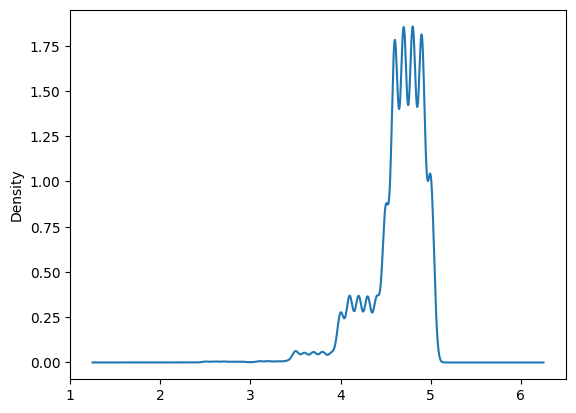

In [12]:
df['ratings'].plot(kind = 'kde')

In [13]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

<Axes: ylabel='count'>

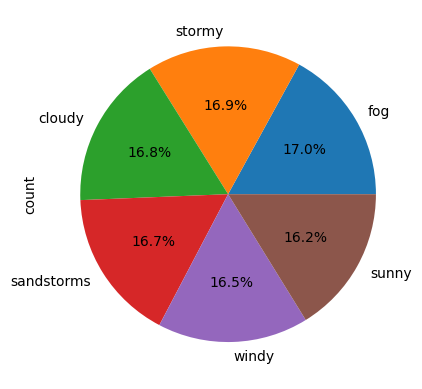

In [14]:
df['weather'].value_counts().plot(kind='pie',autopct = '%.1f%%')  # counts number of entries in dataset

<Axes: ylabel='count'>

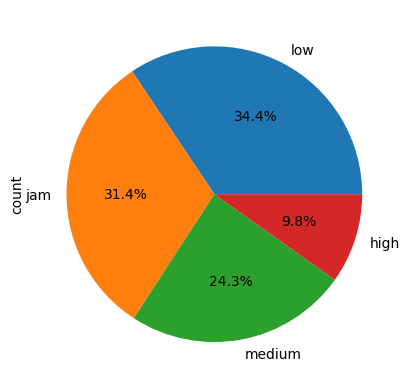

In [15]:
df['traffic'].value_counts().plot(kind='pie',autopct = '%.1f%%')

<Axes: xlabel='city_name'>

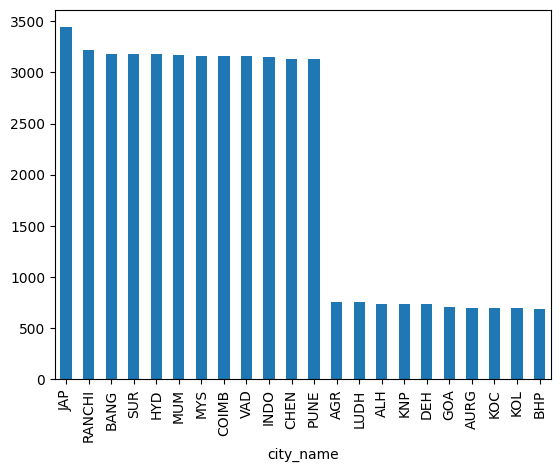

In [16]:
df.city_name.value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

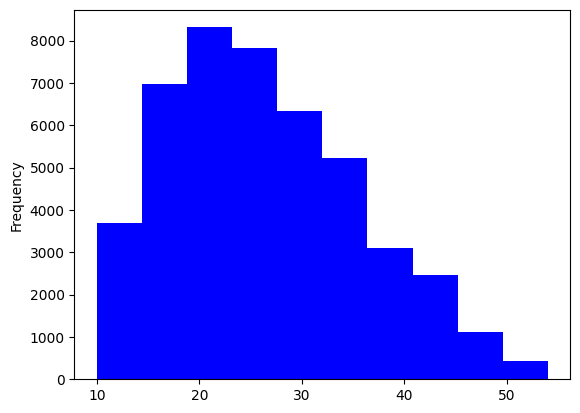

In [17]:
df.time_taken.plot(kind='hist',color='blue')

In [18]:
df.time_taken.min()

10

<Axes: ylabel='Frequency'>

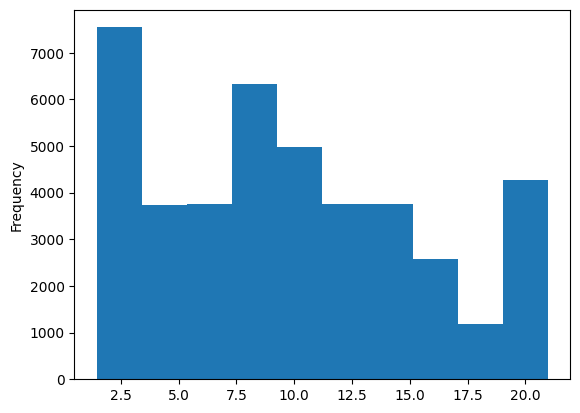

In [19]:
df.distance.plot(kind='hist')

In [20]:
df.distance.max()

20.969489380087342

In [21]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

In [22]:
#feature selection
columns_to_drop = ['rider_id','age','restaurant_latitude','restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date','city_type','order_day_of_week','order_time_hour','order_month']


In [23]:
df.drop(columns = columns_to_drop, inplace = True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ratings              43594 non-null  float64
 1   weather              44977 non-null  object 
 2   traffic              44992 non-null  object 
 3   vehicle_condition    45502 non-null  int64  
 4   type_of_order        45502 non-null  object 
 5   type_of_vehicle      45502 non-null  object 
 6   multiple_deliveries  44509 non-null  float64
 7   festival             45274 non-null  object 
 8   time_taken           45502 non-null  int64  
 9   city_name            45502 non-null  object 
 10  order_day            45502 non-null  int64  
 11  is_weekend           45502 non-null  int64  
 12  pickup_time_minutes  43862 non-null  float64
 13  order_time_of_day    45502 non-null  object 
 14  distance             41872 non-null  float64
dtypes: float64(4), int64(4), object(7)
m

**Data Cleaning**


In [25]:
#missing Values
df.isna().sum()

,0
ratings,1908
weather,525
traffic,510
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
time_taken,0
city_name,0


In [26]:
df.dropna(inplace = True)

In [27]:
df.isna().sum()

,0
ratings,0
weather,0
traffic,0
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,0
festival,0
time_taken,0
city_name,0


In [28]:
#Duplicate Values
df.duplicated().sum()

np.int64(0)

<Axes: >

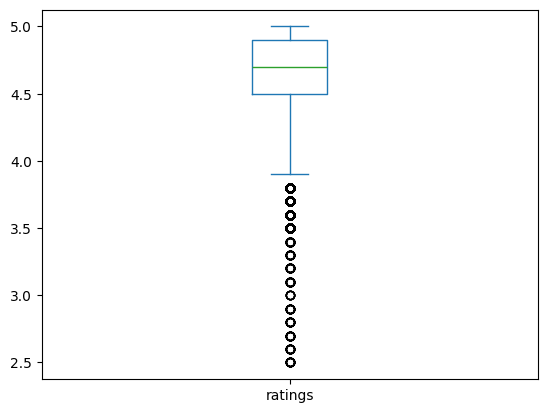

In [29]:
#Outliers ONLY ON Numberical Data Using Box Plot
df.ratings.plot(kind = 'box')


<Axes: >

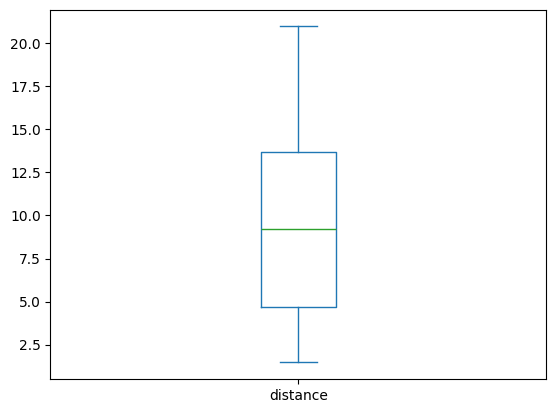

In [30]:
df.distance.plot(kind = 'box')

In [31]:
#feature encoding
x = df.drop(columns = ['time_taken'],axis = 1)
y = df['time_taken']

In [32]:
df.columns

Index(['ratings', 'weather', 'traffic', 'vehicle_condition', 'type_of_order',
       'type_of_vehicle', 'multiple_deliveries', 'festival', 'time_taken',
       'city_name', 'order_day', 'is_weekend', 'pickup_time_minutes',
       'order_time_of_day', 'distance'],
      dtype='object')

In [33]:
Nominal_cols=['type_of_order','festival','city_name','order_time_of_day']
ordinal_cols=['weather','traffic','type_of_vehicle']
numerical_cols=['ratings','vehicle_condition','multiple_deliveries','distance','order_day','is_weekend','pickup_time_minutes']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39068 entries, 0 to 45501
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ratings              39068 non-null  float64
 1   weather              39068 non-null  object 
 2   traffic              39068 non-null  object 
 3   vehicle_condition    39068 non-null  int64  
 4   type_of_order        39068 non-null  object 
 5   type_of_vehicle      39068 non-null  object 
 6   multiple_deliveries  39068 non-null  float64
 7   festival             39068 non-null  object 
 8   time_taken           39068 non-null  int64  
 9   city_name            39068 non-null  object 
 10  order_day            39068 non-null  int64  
 11  is_weekend           39068 non-null  int64  
 12  pickup_time_minutes  39068 non-null  float64
 13  order_time_of_day    39068 non-null  object 
 14  distance             39068 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory

In [35]:
#UpperCase letters - CLASS
#lowercase letters - FUNCTION
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler

In [36]:
nominal_transformer = Pipeline([( "one Hot Encoding",OneHotEncoder(drop = 'first') )])            #expects list of tupples[()]

In [37]:
ordinal_transformer = Pipeline([('ordinal encoder',OrdinalEncoder() )])

In [38]:
numerical_transformer = Pipeline ([('standard scaler',StandardScaler() )])

In [39]:
from sklearn.compose import ColumnTransformer

In [40]:
preprocessing = ColumnTransformer([('Nominal',nominal_transformer,Nominal_cols    ),
                                   ('Ordinal', ordinal_transformer,ordinal_cols),
                                  ('Numerical',numerical_transformer, numerical_cols)])       # list of tupple  ('Name', 'transformer', 'column')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 23)   #train_size or test_size both are same

In [43]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = Pipeline([('Data Preprocessing',preprocessing),
                    ('Linear Regression',LinearRegression())])

lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('R2 Score',r2_score(y_test,y_pred))

Mean Squared Error 45.25910811530021
R2 Score 0.47324016998204166


In [44]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model = Pipeline([('Data Preprocessing',preprocessing),
                    ('KNN',KNeighborsRegressor())])
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('R2 Score',r2_score(y_test,y_pred))

Mean Squared Error 38.90169439467622
R2 Score 0.5472325730647183


In [45]:
#DecisionTree
from sklearn.tree import DecisionTreeRegressor
dt_model =  Pipeline([('Data Preprocessing',preprocessing),
                    ('DT',DecisionTreeRegressor())])
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('R2 Score',r2_score(y_test,y_pred))

Mean Squared Error 47.1635525979012
R2 Score 0.45107480054131244


In [46]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_model = Pipeline([('Data Preprocessing',preprocessing),
                    ('Rf',RandomForestRegressor())])
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('R2 Score',r2_score(y_test,y_pred))

Mean Squared Error 24.856896365497825
R2 Score 0.7106965857368003


In [47]:
import pickle        # serialization

In [48]:
with open ('model.pkl','wb') as file:   #wb - write it as binary file
  pickle.dump(rf_model,file)